In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('outputs/cleaned_bank_churn.csv')


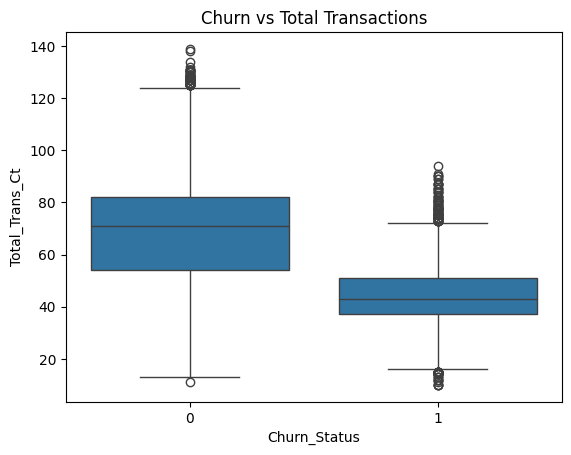

In [3]:
sns.boxplot(x='Churn_Status', y='Total_Trans_Ct', data=df)
plt.title('Churn vs Total Transactions')
plt.show()


In [ ]:
# This boxplot supports H1:
# Customers with fewer total transactions are more likely to churn.

SyntaxError: invalid syntax (1101162071.py, line 2)

In [6]:
# This could be an important early-warning signal. You may now want to:

# Check a statistical test (e.g. t-test) for confirmation

# Use thresholds to define “low engagement” for operational targeting

In [7]:
# Overall spread lower for churned group, Suggests a pattern: low transaction count is linked to churn


In [8]:
# H2: Lower credit utilization → churn

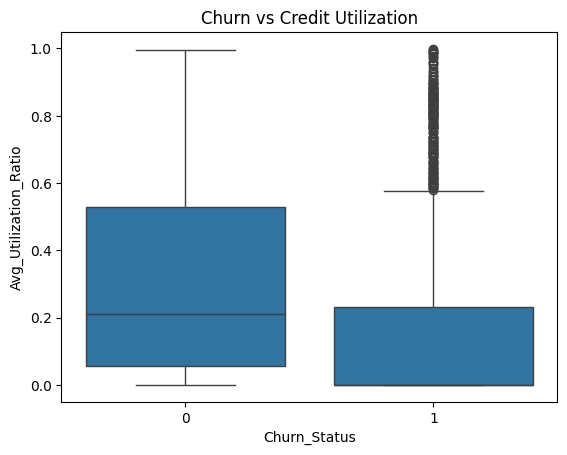

In [9]:
sns.boxplot(x='Churn_Status', y='Avg_Utilization_Ratio', data=df)
plt.title('Churn vs Credit Utilization')
plt.show()


In [10]:
# H2 Supported:
#The plot suggests that lower average credit utilization is linked to higher churn risk.
# This supports the idea that disengaged or low-activity users are more likely to leave. These could be customers:
# - Who don’t see enough value in the product
# - Who are using alternative credit sources
# - Or who were acquired but never activated

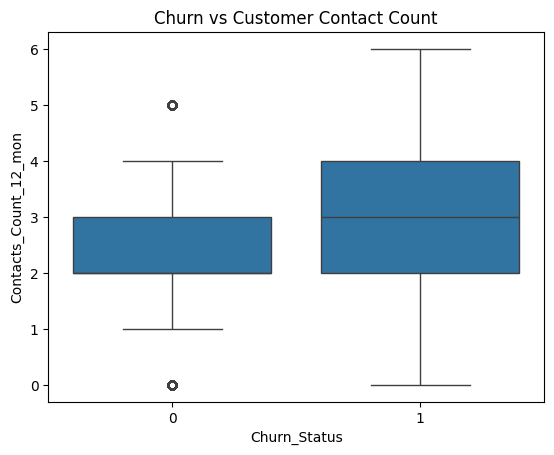

In [11]:
# H3: Fewer service contacts → churn

sns.boxplot(x='Churn_Status', y='Contacts_Count_12_mon', data=df)
plt.title('Churn vs Customer Contact Count')
plt.show()


In [12]:
# Summary for H3
# Not supported:
# The plot suggests that churned customers had more service contacts, not fewer.
# This may indicate:
# Frustration or unresolved issues driving increased contact before churn
# Escalations or complaints before leaving
# A segment of “vocal but dissatisfied” customers

In [13]:
# follow-up actions FOR H3:

df['Contact_Bucket'] = pd.cut(df['Contacts_Count_12_mon'], bins=[0,1,3,5,7], labels=['0-1','2-3','4-5','6+'])


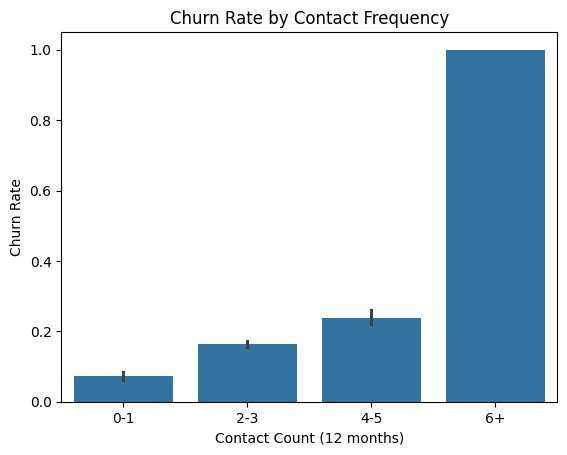

In [14]:
# Visualise churn rate by bucket:

sns.barplot(x='Contact_Bucket', y='Churn_Status', data=df)
plt.title('Churn Rate by Contact Frequency')
plt.ylabel('Churn Rate')
plt.xlabel('Contact Count (12 months)')
plt.show()


In [15]:
pd.crosstab(df['Contact_Bucket'], df['Card_Category'], values=df['Churn_Status'], aggfunc='mean')


Card_Category,Blue,Gold,Platinum,Silver
Contact_Bucket,,,,
0-1,0.071633,0.100000,0.000000,0.075949
2-3,0.165253,0.172840,0.230769,0.140992
4-5,0.237323,0.272727,0.666667,0.240000
6+,1.000000,1.000000,NaN,1.000000


In [16]:
# H3 follow up action confirme High contact frequency is a signal of churn, not low contact frequency.
# ❌ H3 is not supported — churn is not driven by silence.
# ✅ Instead, higher contact frequency correlates with increased churn.
# Customers with 6+ contacts in 12 months are highly likely to churn
# These may be “high-effort” or “high-friction” users with unresolved issues
# You can flag high-contact users for proactive intervention

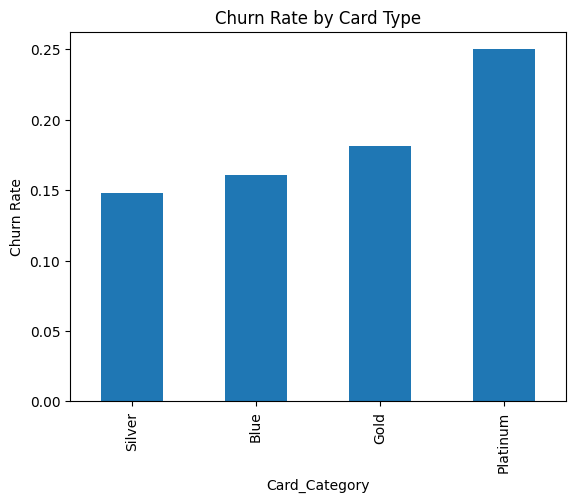

In [17]:
# H4 Blue card holders -> higher churn

churn_by_card = df.groupby('Card_Category')['Churn_Status'].mean().sort_values()
churn_by_card.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Card Type')
plt.show()


In [18]:
#  Conclusion for H4
# ❌ H4 is not supported
# Blue card holders do not churn more than premium users.
# In fact, Platinum card holders have the highest churn rate.
# Possible Reasons
# - This might mean:
# - Higher-tier cardholders (like Platinum) have higher expectations or more frequent service needs
# - They may churn due to value misalignment or better offers from competitors
# - Or they may be trial users of premium services who didn’t renew

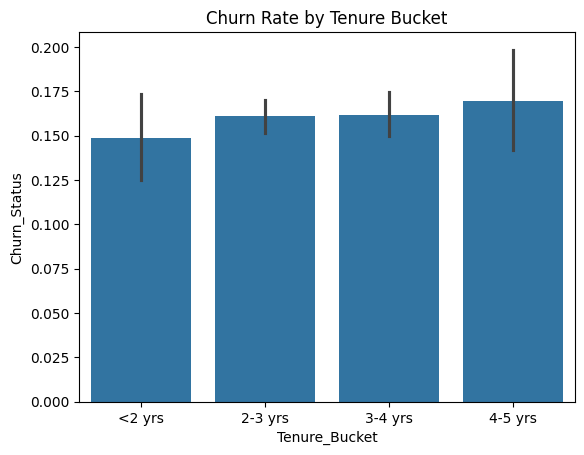

In [19]:
# H5: Newer customers → higher churn

df['Tenure_Bucket'] = pd.cut(df['Months_on_book'], bins=[0, 24, 36, 48, 60], labels=['<2 yrs','2-3 yrs','3-4 yrs','4-5 yrs'])
sns.barplot(x='Tenure_Bucket', y='Churn_Status', data=df)
plt.title('Churn Rate by Tenure Bucket')
plt.show()


In [20]:
# H5 Summary
# H5 is not supported.
# The churn rate is actually lowest for the newest customers and rises slightly with time — not the other way around.
# So customers are not dropping out early — if anything, the longer they stay, the more likely they may eventually churn.

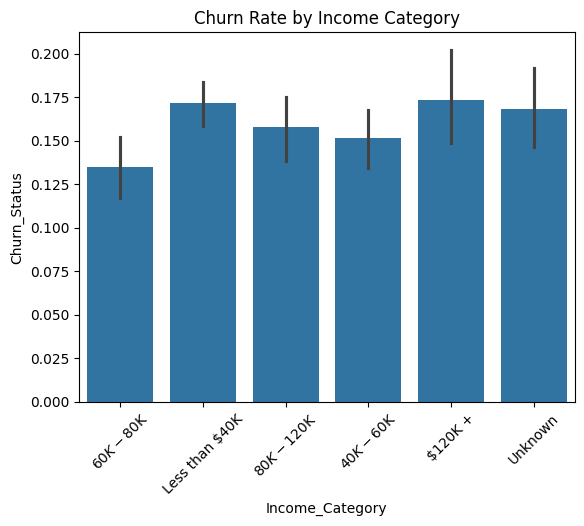

In [21]:
# H6 (Lower income → higher churn)

sns.barplot(x='Income_Category', y='Churn_Status', data=df)
plt.title('Churn Rate by Income Category')
plt.xticks(rotation=45)
plt.show()


In [22]:
# H6 is partially supported, but not strongly.
# There’s slightly higher churn in low-income brackets, but differences are small and not clearly statistically significant.
# More segmentation or additional context (e.g., financial stress or usage patterns) would help.

In [23]:
# New Hypothesis Combine income with credit utilisation or transactions to create cross-segments.
# Example: Segment by income AND utilisation level

# Create utilisation buckets
df['Util_Bucket'] = pd.cut(df['Avg_Utilization_Ratio'], bins=[-0.01, 0.3, 0.7, 1.0],
                           labels=['Low', 'Medium', 'High'])

# Compare churn by income + utilisation
pd.crosstab([df['Income_Category'], df['Util_Bucket']], df['Churn_Status'], normalize='index')


Churn_Status                        0         1
Income_Category Util_Bucket                    
$120K +         Low          0.812006  0.187994
                Medium       0.927711  0.072289
                High         0.909091  0.090909
$40K - $60K     Low          0.783868  0.216132
                Medium       0.937705  0.062295
                High         0.887324  0.112676
$60K - $80K     Low          0.837631  0.162369
                Medium       0.949275  0.050725
                High         0.936709  0.063291
$80K - $120K    Low          0.832146  0.167854
                Medium       0.907767  0.092233
                High         0.833333  0.166667
Less than $40K  Low          0.729730  0.270270
                Medium       0.923466  0.076534
                High         0.861736  0.138264
Unknown         Low          0.812421  0.187579
                Medium       0.886275  0.113725
                High         0.852941  0.147059

In [24]:
# 1. Low-income, Low-Utilisation = Highest Churn
# Less than $40K & Low Utilisation
# → 27% churn rate (0.270) ← highest in the table
# These users may be:
# Financially disengaged
# At risk of leaving due to poor value perception
# 2. Across all income bands, Medium Utilisation = Lowest Churn
# E.g., $60K–$80K & Medium → 5% churn
# Engagement sweet spot: customers use their credit moderately and likely find value in the product
# 3. High Utilisation ≠ High Churn
# Surprisingly, high-utilisation customers are more loyal across all income brackets
# $120K+ & High → only 9% churn# 
# $60K–$80K & High → 6% churn
# This supports your H10 later: Low-income, high-utilisation users are more loyal

C:\Users\selin\AppData\Local\Temp\ipykernel_5428\3779570281.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Marital_Status', y='Churn_Status', ci='sd')


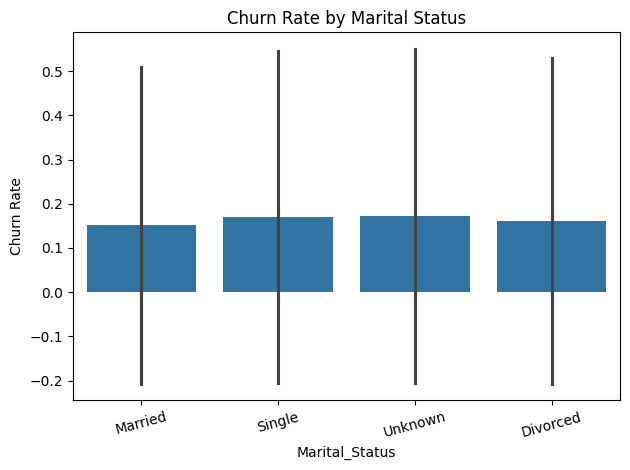

In [26]:
# H7: Unmarried customers are more likely to churn

sns.barplot(data=df, x='Marital_Status', y='Churn_Status', ci='sd')
plt.title('Churn Rate by Marital Status')
plt.ylabel('Churn Rate')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [27]:
# double check the encoding of churn status
df['Churn_Status'].value_counts()
df['Churn_Status'].dtype


dtype('int64')

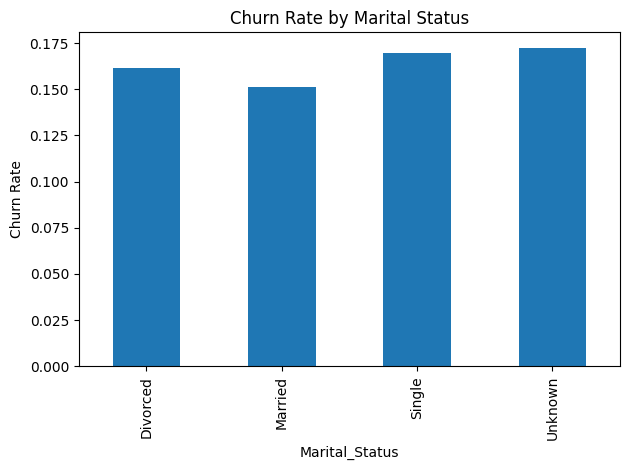

In [28]:
# use grouped bar chart compares actual chrun rates

df.groupby('Marital_Status')['Churn_Status'].mean().plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Marital Status')
plt.tight_layout()
plt.show()


In [30]:
# H7: Churn Rate by Marital Status summary
#  Insight:
# Single and Unknown marital status groups show the highest churn rates, slightly higher than Married.
# The difference is modest but consistent, which supports H7:
# “Unmarried customers are more likely to churn.”
# Why it matters:
# Relationship or life-stage status may impact financial stability, loyalty, or perceived need for credit products.
# Single or divorced users may:
# Be less tied to a specific provider,
# Have more financial uncertainty, or
# Respond differently to loyalty programs.

# Recommendation:
# This finding supports the hypothesis.
# You could:
# Segment campaigns for Single vs Married customers.
# Personalise messaging to reflect lifestyle (e.g., independent banking, flexibility).
# Consider offering relationship-based rewards or bundles for stability segments.

C:\Users\selin\AppData\Local\Temp\ipykernel_5428\1429827165.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Education_Level', y='Churn_Status', ci='sd')


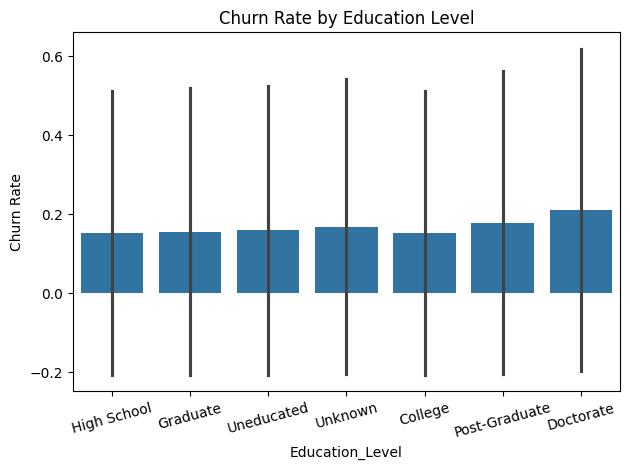

In [31]:
# H8: Customers with less education are more likely to churn

sns.barplot(data=df, x='Education_Level', y='Churn_Status', ci='sd')
plt.title('Churn Rate by Education Level')
plt.ylabel('Churn Rate')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# H8 summry
# Insight:
# Surprisingly, higher education levels (Doctorate, Post-Graduate) show higher churn rates than others.
# Less educated groups (High School, Uneducated) show lower or moderate churn rates.
# This contradicts H8, which assumed that less financial literacy (possibly correlated with education level) would increase churn# 

# Interpretation:
# Customers with higher education might:
# Be more financially savvy, actively seeking better terms or products.
# Have higher expectations, leading to dissatisfaction and churn if unmet.
# Less educated customers may be less engaged but also less likely to switch due to inertia or lack of comparison.

# Recommendation:
# This does not support H8. The inverse appears true.
# Consider segmenting Doctorate/Post-Graduate users for:
# Proactive retention with tailored offers.
# More detailed product information and clarity in communication.

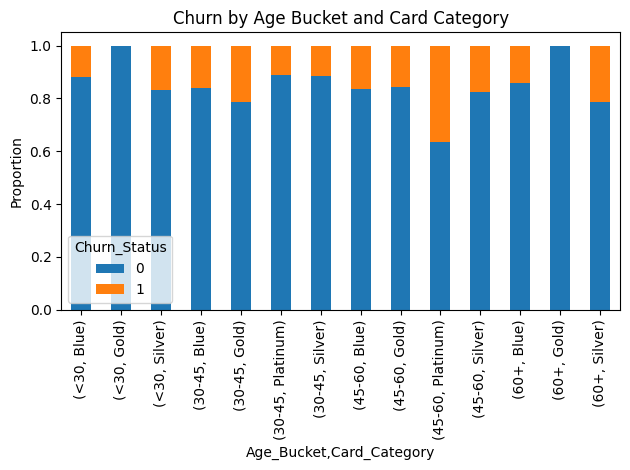

In [33]:
# H9: Younger Blue card users churn at higher rates than older premium users

# Create age buckets
df['Age_Bucket'] = pd.cut(df['Customer_Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])

# Compare churn across Age Bucket + Card Category
pivot = pd.crosstab(index=[df['Age_Bucket'], df['Card_Category']], 
                    columns=df['Churn_Status'], normalize='index')
pivot.plot(kind='bar', stacked=True)
plt.title('Churn by Age Bucket and Card Category')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


In [34]:
# H9 Summary
# Young Blue card users churn the least
# Churn is higher among:
# Older Silver and Gold card users
# Some young premium-tier card holders

# Young Blue card users have low churn	These users may be newer or less demanding
# Premium card users under 30 have higher churn	Possibly mismatch in expectations or insufficient value
# Older Silver card users also churn more	Suggests possible frustration or disengagement over time

# Recommendation:
# Reword H9 in your report to reflect the opposite finding
# Consider investigating drivers of retention in younger Blue card users (e.g., onboarding success)
# Explore why premium card tiers are not retaining younger users

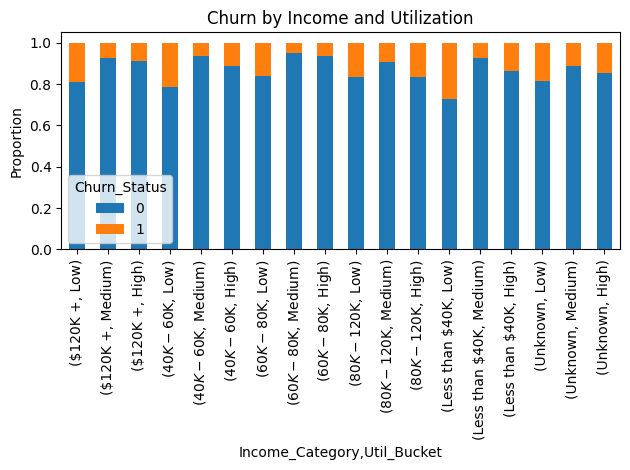

In [35]:
#  H10: Low-income customers with high utilization are less likely to churn

# Create Utilization buckets
df['Util_Bucket'] = pd.cut(df['Avg_Utilization_Ratio'], bins=[-0.01, 0.3, 0.7, 1.0], labels=['Low', 'Medium', 'High'])

# Compare churn rate by Income + Utilization
pd.crosstab(index=[df['Income_Category'], df['Util_Bucket']], 
            columns=df['Churn_Status'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn by Income and Utilization')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [36]:
# H10 Summary:
# Key Observations
# 🔸 Segment: Less than $40K, High
# Small orange segment → Low churn
# Suggests high engagement from financially stretched customers
# 🔸 Segment: $40K – 60K, High and $60K – 80K, High
# Also show low churn with high utilisation
# Reinforces idea that high utilisation users across income bands tend to stay
# 🔸 Segment: $120K+, Low
# Large orange section → High churn# 
# Indicates disengaged high-income users are more likely to leave
# Low-income + high utilisation	Low	These customers are loyal — likely because they rely on the product
# High-income + low utilisation	High	These users churn faster — possibly due to low perceived value

# Recommendation
# Prioritise retention strategies for high-utilisation, low-income users
# Upsell or engage high-income low-usage users to prevent silent churn
# Consider offering tailored support to help loyal but financially stretched users stay longer